In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('Advertising.csv', index_col=0)
print(data.shape)
data.head()

(200, 4)


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


- Sales = wlTV + w2Radio + w3NP + b 회귀모형

## 탐색적 분석(EDA) - 시각화

In [3]:
import seaborn as sns

/Users/jeonghunp/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


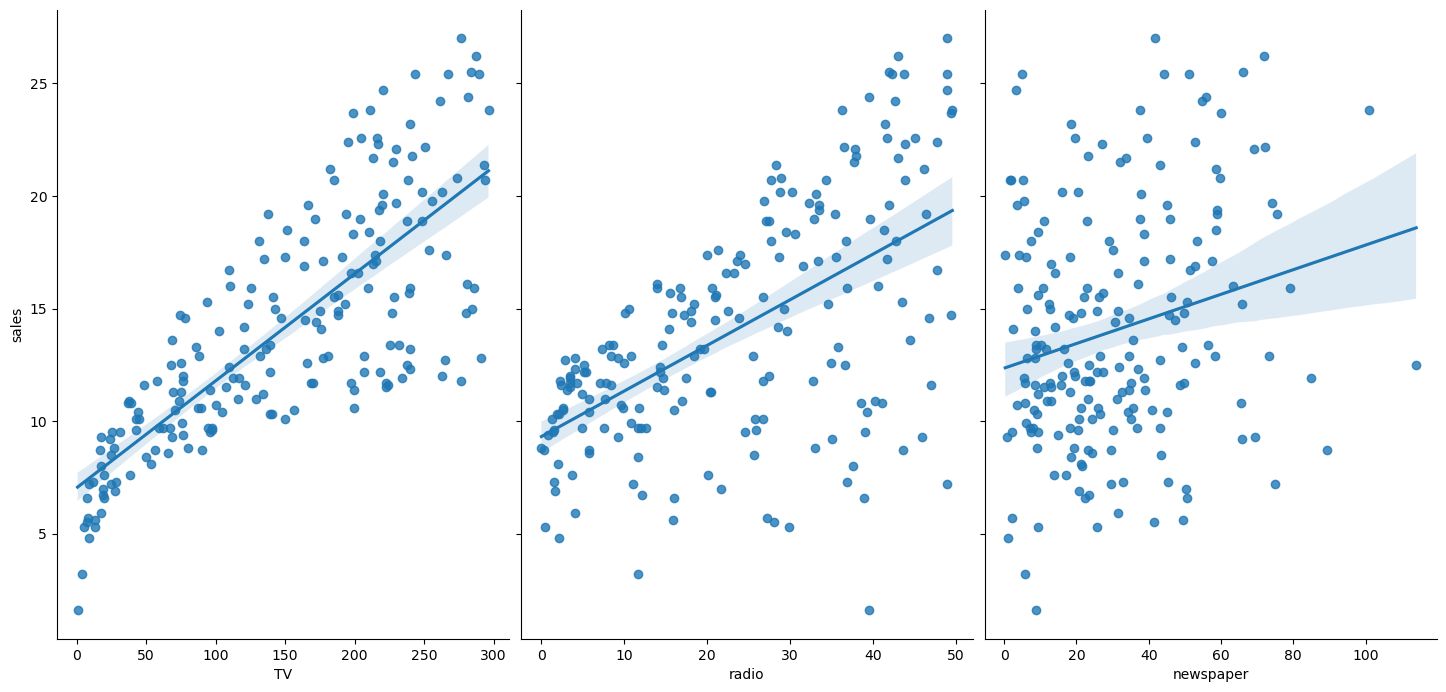

In [4]:
sns.pairplot(data, x_vars=["TV","radio","newspaper"], y_vars="sales",
             kind='reg', aspect=0.7, size=7)

## 예측모델: 선형회귀 Linear Regression

- 장점: 하이퍼파라미터튜닝 필요없음, 식으로 만들 수 있어서 이해하기가 쉬움
- 단점: 최고의 예측 정확도를 만들어내는 모델 불가능, 과거 데이터에 과적합되어서 일반화된 모델을 만들지 못함

In [5]:
x=["TV","radio","newspaper"]

In [6]:
X=data[x]
y=data['sales']
X

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


### 훈련데이터와 테스트데이터를 나누자!

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=18)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


### 예측모델 - 선형회귀

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model=LinearRegression()

### 모델 학습

In [12]:
model.fit(X_train,y_train)

LinearRegression()

In [13]:
prediction = model.predict(X_test)

### 모델 평가

In [16]:
actual = [100,50,30,20]
predict = [90,50,50,30]
predict1 = [95,50,45,50]

### MAE(에러들의 절대값의 평균)

In [14]:
(10+0+20+10)/4

10.0

### MSE(에러들의 자승의 평균)

In [17]:
(10**2+0**2+20**2+10**2)/4

150.0

In [18]:
from sklearn import metrics

In [19]:
metrics.mean_absolute_error(actual, predict)

10.0

In [20]:
metrics.mean_absolute_error(y_test,prediction)

1.5308776401678659

In [21]:
metrics.mean_squared_error(y_test,prediction)

4.41229423861466